In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# data partition
from math import ceil

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# embedded methods
from sklearn.linear_model import LassoCV

import warnings
warnings.filterwarnings('ignore')

In [105]:
df=pd.read_sas('a2z_insurance.sas7bdat')
df.head()

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
0,1.0,1985.0,1982.0,b'2 - High School',2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
1,2.0,1981.0,1995.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
2,3.0,1991.0,1970.0,b'1 - Basic',2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
3,4.0,1990.0,1981.0,b'3 - BSc/MSc',1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
4,5.0,1986.0,1973.0,b'3 - BSc/MSc',1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45


In [4]:
df.shape

(10296, 14)

In [5]:
df.columns

Index(['CustID', 'FirstPolYear', 'BirthYear', 'EducDeg', 'MonthSal',
       'GeoLivArea', 'Children', 'CustMonVal', 'ClaimsRate', 'PremMotor',
       'PremHousehold', 'PremHealth', 'PremLife', 'PremWork'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustID         10296 non-null  float64
 1   FirstPolYear   10266 non-null  float64
 2   BirthYear      10279 non-null  float64
 3   EducDeg        10279 non-null  object 
 4   MonthSal       10260 non-null  float64
 5   GeoLivArea     10295 non-null  float64
 6   Children       10275 non-null  float64
 7   CustMonVal     10296 non-null  float64
 8   ClaimsRate     10296 non-null  float64
 9   PremMotor      10262 non-null  float64
 10  PremHousehold  10296 non-null  float64
 11  PremHealth     10253 non-null  float64
 12  PremLife       10192 non-null  float64
 13  PremWork       10210 non-null  float64
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [7]:
df.isna().sum()

CustID             0
FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [106]:
metric_features=['CustID', 'FirstPolYear', 'BirthYear', 'MonthSal',
       'GeoLivArea', 'Children', 'CustMonVal', 'ClaimsRate', 'PremMotor',
       'PremHousehold', 'PremHealth', 'PremLife', 'PremWork']
non_metric_features = ['EducDeg']

In [9]:
df.describe() #Descrição numérica e categórica de todas as colunas

,CustID,FirstPolYear,BirthYear,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
count,10296.00000,10266.000000,10279.000000,10260.000000,10295.000000,10275.000000,10296.000000,10296.000000,10262.000000,10296.000000,10253.000000,10192.000000,10210.000000
mean,5148.50000,1991.062634,1968.007783,2506.667057,2.709859,0.706764,177.892605,0.742772,300.470252,210.431192,171.580833,41.855782,41.277514
std,2972.34352,511.267913,19.709476,1157.449634,1.266291,0.455268,1945.811505,2.916964,211.914997,352.595984,296.405976,47.480632,51.513572
min,1.00000,1974.000000,1028.000000,333.000000,1.000000,0.000000,-165680.420000,0.000000,-4.110000,-75.000000,-2.110000,-7.000000,-12.000000
25%,2574.75000,1980.000000,1953.000000,1706.000000,1.000000,0.000000,-9.440000,0.390000,190.590000,49.450000,111.800000,9.890000,10.670000
50%,5148.50000,1986.000000,1968.000000,2501.500000,3.000000,1.000000,186.870000,0.720000,298.610000,132.800000,162.810000,25.560000,25.670000
75%,7722.25000,1992.000000,1983.000000,3290.250000,4.000000,1.000000,399.777500,0.980000,408.300000,290.050000,219.820000,57.790000,56.790000
max,10296.00000,53784.000000,2001.000000,55215.000000,4.000000,1.000000,11875.890000,256.200000,11604.420000,25048.800000,28272.000000,398.300000,1988.700000


In [11]:
df[df.isna().any(axis=1)]

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
21,22.0,1977.0,1958.0,b'2 - High School',NaN,3.0,1.0,111.37,0.80,407.52,111.70,100.13,24.67,30.34
68,69.0,1983.0,1977.0,b'2 - High School',1399.0,4.0,1.0,476.65,0.33,330.73,186.70,211.15,NaN,15.78
138,139.0,1979.0,1976.0,b'2 - High School',2538.0,2.0,1.0,149.59,0.69,194.26,305.60,NaN,37.34,17.67
143,144.0,1996.0,1990.0,b'3 - BSc/MSc',NaN,4.0,1.0,-42.45,1.02,146.36,353.95,220.04,121.80,42.01
184,185.0,1993.0,1984.0,b'2 - High School',2419.0,4.0,1.0,-62.23,1.07,NaN,253.95,230.60,5.89,43.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,10011.0,NaN,1947.0,b'2 - High School',3959.0,2.0,NaN,-128.24,1.14,177.81,153.35,311.28,67.79,35.45
10057,10058.0,1983.0,1980.0,b'2 - High School',1569.0,4.0,1.0,222.60,0.55,235.60,211.15,NaN,32.34,68.79
10142,10143.0,1986.0,1985.0,b'3 - BSc/MSc',1652.0,3.0,1.0,55.67,0.88,257.05,94.45,308.39,NaN,13.78
10284,10285.0,1980.0,1987.0,b'3 - BSc/MSc',1504.0,4.0,1.0,-1.55,0.96,390.63,29.45,179.70,-6.00,NaN


In [12]:
PremZero=df[['PremMotor','PremHousehold','PremHealth','PremLife','PremWork']] == 0

In [13]:
PremZero.value_counts()

PremMotor  PremHousehold  PremHealth  PremLife  PremWork
False      False          False       False     False       10236
           True           False       False     False          60
dtype: int64

In [14]:
# # Pairwise Relationship of Numerical Variables
# sns.set()

# # Setting pairplot
# sns.pairplot(df )#diag_kind="hist"

# # Layout
# plt.subplots_adjust(top=0.95)
# plt.suptitle("Pairwise Relationship Variables", fontsize=20)

# plt.show()

KeyboardInterrupt: 

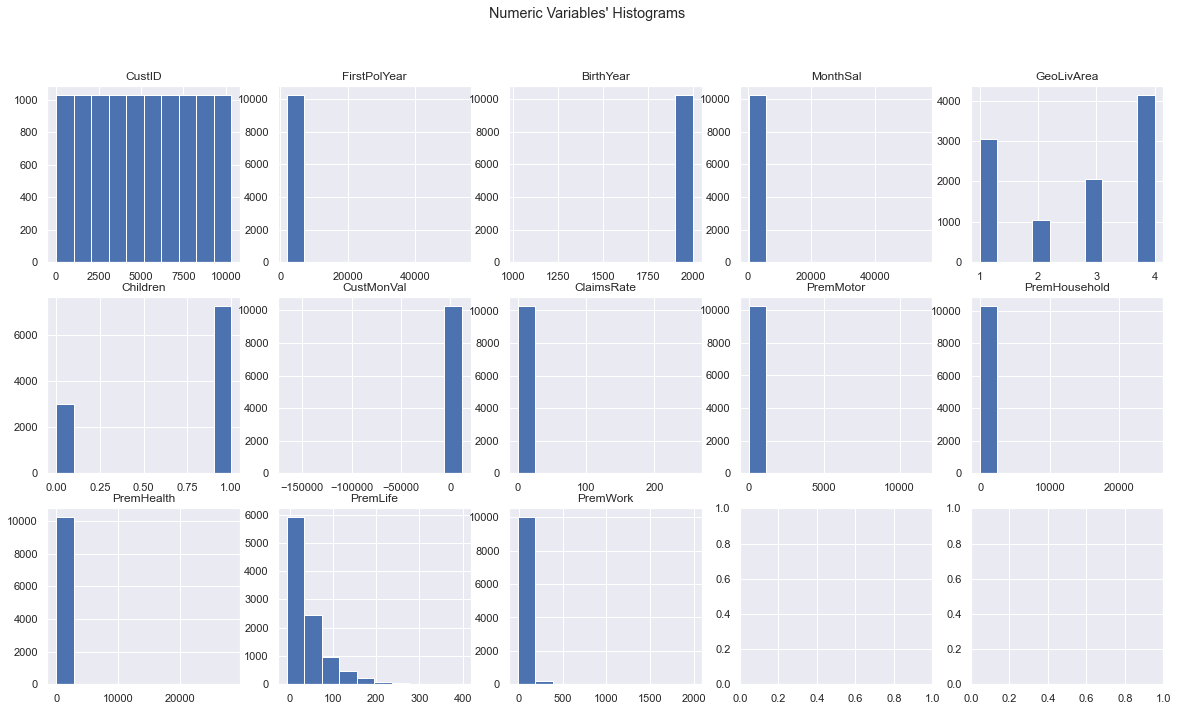

In [15]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    # CODE HERE (extra: set each axis title as the feature name)
    ax.hist(df[feat])
    ax.set_title(feat)

    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

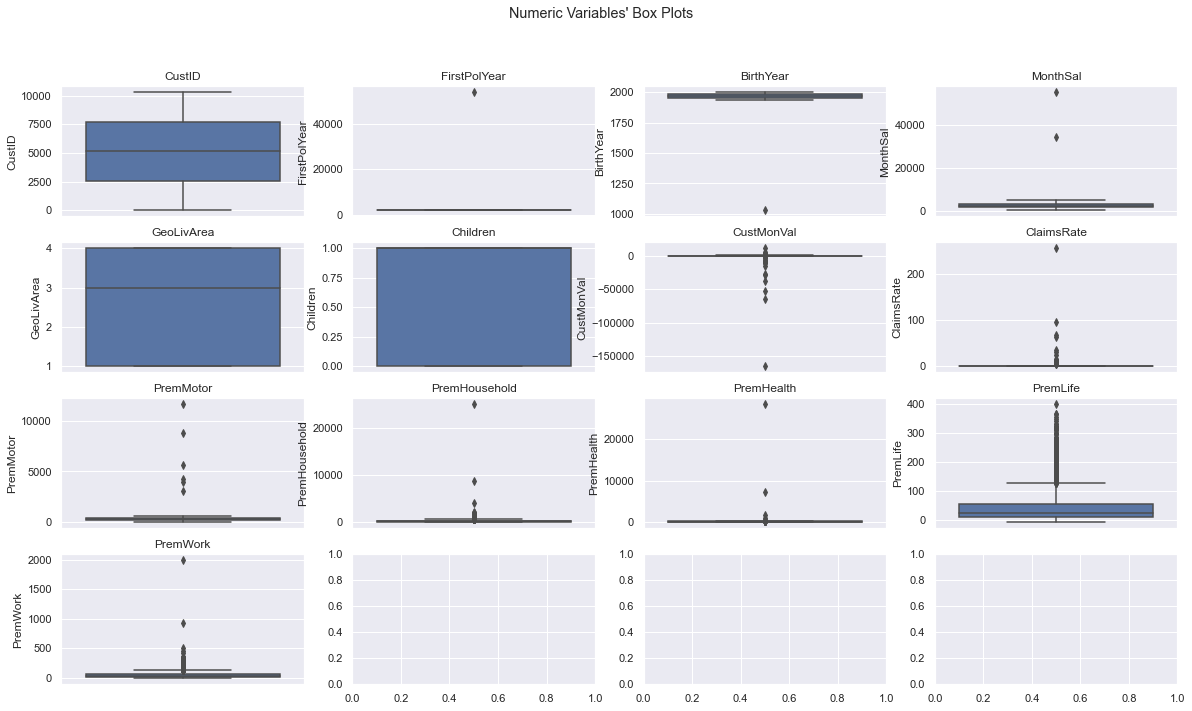

In [16]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(4, ceil(len(metric_features) / 4), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    # CODE HERE
    sns.boxplot(y=df[feat] , ax=ax)
    ax.set_title(feat)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

Create a df without rows with NaN values

In [108]:
# print(df)
is_NaN = df. isnull()
row_has_NaN = is_NaN. any(axis=1)
rows_with_NaN = df[row_has_NaN]
df_noNaN=df[~row_has_NaN]
print(len(rows_with_NaN),len(rows_with_NaN)/len(df)*100)
print(len(df_noNaN))

309 3.0011655011655014
9987


## Z-Score

In [109]:
count=0
for feature in df[metric_features].columns:
    zscore=pd.Series(df[feature] - df[feature].mean() ) / df[feature].std()
#     print(zscore[zscore>3])
    count+=(len(zscore[zscore>3])+len(zscore[zscore<-3]))
    print(feature,len(zscore[zscore>3])+len(zscore[zscore<-3]),(len(zscore[zscore>3])+len(zscore[zscore<-3]))/len(df)*100)
print()
print(count/len(df)*100)

CustID 0 0.0
FirstPolYear 1 0.009712509712509712
BirthYear 1 0.009712509712509712
MonthSal 2 0.019425019425019424
GeoLivArea 0 0.0
Children 0 0.0
CustMonVal 13 0.12626262626262627
ClaimsRate 12 0.11655011655011654
PremMotor 6 0.05827505827505827
PremHousehold 36 0.34965034965034963
PremHealth 3 0.029137529137529136
PremLife 210 2.0396270396270397
PremWork 159 1.5442890442890442

4.302641802641802


## LOF

In [148]:
##To review

# import the algorithm
from sklearn.neighbors import LocalOutlierFactor
#initialise the algorithm
lof = LocalOutlierFactor(n_neighbors = 20)
#fit it to the training data, since we don't use it for novelty than
# this is fine
y_pred = lof.fit_predict(df_noNaN[metric_features])
#extract the predictions as strings
df_noNaN["lof_outliers"] = y_pred.astype(str)
#print the number of outliers relative to non-outliers
print(df_noNaN["lof_outliers"].value_counts())
#extract the outlier scores
# df_noNaN["lof_scores"] = lof.negative_outlier_factor_
print(len(df_noNaN[df_noNaN["iso_forest_outliers"]=="-1"])/len(df)*100)

1     9898
-1      89
Name: lof_outliers, dtype: int64
1.9425019425019423


In [53]:
print(len(X_scores),len(filled_df))

10296 10296


In [54]:
len(df.columns)

14

## Isolation Forest

In [145]:
from sklearn.ensemble import IsolationForest#create the method instance
isf = IsolationForest(n_estimators = 100, random_state = 42, contamination = 0.02)
#use fit_predict on the data as we are using all the data
preds = isf.fit_predict(df_noNaN[metric_features])
#extract outliers from the data
df_noNaN["iso_forest_outliers"] = preds
df_noNaN["iso_forest_outliers"] = df_noNaN["iso_forest_outliers"].astype(str)
#extract the scores from the data in terms of strength of outlier
df_noNaN["iso_forest_scores"] = isf.decision_function(df_noNaN[metric_features])#print how many outliers the data suggests
print(df_noNaN["iso_forest_outliers"].value_counts())# Out:
print(len(df_noNaN[df_noNaN["iso_forest_outliers"]=="-1"])/len(df)*100)

1     9787
-1     200
Name: iso_forest_outliers, dtype: int64
1.9425019425019423


In [111]:
df_withoutOutliers=df.iloc[df_noNaN[df_noNaN['iso_forest_outliers']=="1"].index]
df_withoutOutliers

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
0,1.0,1985.0,1982.0,b'2 - High School',2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
1,2.0,1981.0,1995.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
2,3.0,1991.0,1970.0,b'1 - Basic',2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
3,4.0,1990.0,1981.0,b'3 - BSc/MSc',1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
4,5.0,1986.0,1973.0,b'3 - BSc/MSc',1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10290,10291.0,1994.0,1999.0,b'1 - Basic',626.0,3.0,1.0,176.26,0.85,6.89,878.50,103.13,113.02,201.26
10291,10292.0,1984.0,1949.0,b'4 - PhD',3188.0,2.0,0.0,-0.11,0.96,393.74,49.45,173.81,9.78,14.78
10293,10294.0,1994.0,1976.0,b'3 - BSc/MSc',2918.0,1.0,1.0,524.10,0.21,403.63,132.80,142.25,12.67,4.89
10294,10295.0,1981.0,1977.0,b'1 - Basic',1971.0,2.0,1.0,250.05,0.65,188.59,211.15,198.37,63.90,112.91


In [112]:
df_num=df[['CustID', 'FirstPolYear', 'BirthYear', 'MonthSal',
       'GeoLivArea', 'Children', 'CustMonVal', 'ClaimsRate', 'PremMotor',
       'PremHousehold', 'PremHealth', 'PremLife', 'PremWork']]

In [113]:
df_cat=df[['EducDeg']]

## FillNA com KNN Inputer

In [114]:
df_toFill=pd.concat([df_withoutOutliers,rows_with_NaN]).sort_index()
df_toFill

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
0,1.0,1985.0,1982.0,b'2 - High School',2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
1,2.0,1981.0,1995.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
2,3.0,1991.0,1970.0,b'1 - Basic',2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
3,4.0,1990.0,1981.0,b'3 - BSc/MSc',1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
4,5.0,1986.0,1973.0,b'3 - BSc/MSc',1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10290,10291.0,1994.0,1999.0,b'1 - Basic',626.0,3.0,1.0,176.26,0.85,6.89,878.50,103.13,113.02,201.26
10291,10292.0,1984.0,1949.0,b'4 - PhD',3188.0,2.0,0.0,-0.11,0.96,393.74,49.45,173.81,9.78,14.78
10293,10294.0,1994.0,1976.0,b'3 - BSc/MSc',2918.0,1.0,1.0,524.10,0.21,403.63,132.80,142.25,12.67,4.89
10294,10295.0,1981.0,1977.0,b'1 - Basic',1971.0,2.0,1.0,250.05,0.65,188.59,211.15,198.37,63.90,112.91


In [115]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3).fit(df_toFill[metric_features])
filled_df = imputer.transform(df_toFill[metric_features])

In [116]:
filled_df=pd.DataFrame(filled_df, index=df_toFill[metric_features].index , columns=df_toFill[metric_features].columns)
filled_df

,CustID,FirstPolYear,BirthYear,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
0,1.0,1985.0,1982.0,2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
1,2.0,1981.0,1995.0,677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
2,3.0,1991.0,1970.0,2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
3,4.0,1990.0,1981.0,1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
4,5.0,1986.0,1973.0,1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10290,10291.0,1994.0,1999.0,626.0,3.0,1.0,176.26,0.85,6.89,878.50,103.13,113.02,201.26
10291,10292.0,1984.0,1949.0,3188.0,2.0,0.0,-0.11,0.96,393.74,49.45,173.81,9.78,14.78
10293,10294.0,1994.0,1976.0,2918.0,1.0,1.0,524.10,0.21,403.63,132.80,142.25,12.67,4.89
10294,10295.0,1981.0,1977.0,1971.0,2.0,1.0,250.05,0.65,188.59,211.15,198.37,63.90,112.91


In [117]:
filled_df=pd.concat([filled_df,df_toFill['EducDeg']],axis=1)
filled_df

,CustID,FirstPolYear,BirthYear,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,EducDeg
0,1.0,1985.0,1982.0,2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89,b'2 - High School'
1,2.0,1981.0,1995.0,677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13,b'2 - High School'
2,3.0,1991.0,1970.0,2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02,b'1 - Basic'
3,4.0,1990.0,1981.0,1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34,b'3 - BSc/MSc'
4,5.0,1986.0,1973.0,1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45,b'3 - BSc/MSc'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10290,10291.0,1994.0,1999.0,626.0,3.0,1.0,176.26,0.85,6.89,878.50,103.13,113.02,201.26,b'1 - Basic'
10291,10292.0,1984.0,1949.0,3188.0,2.0,0.0,-0.11,0.96,393.74,49.45,173.81,9.78,14.78,b'4 - PhD'
10293,10294.0,1994.0,1976.0,2918.0,1.0,1.0,524.10,0.21,403.63,132.80,142.25,12.67,4.89,b'3 - BSc/MSc'
10294,10295.0,1981.0,1977.0,1971.0,2.0,1.0,250.05,0.65,188.59,211.15,198.37,63.90,112.91,b'1 - Basic'


In [140]:
filled_df.isna().sum()

CustID            0
FirstPolYear      0
BirthYear         0
MonthSal          0
GeoLivArea        0
Children          0
CustMonVal        0
ClaimsRate        0
PremMotor         0
PremHousehold     0
PremHealth        0
PremLife          0
PremWork          0
EducDeg          17
dtype: int64

In [139]:
filled_df['EducDeg']=filled_df['EducDeg'].fillna(filled_df['EducDeg'].mode())